In [35]:
# Importing necessary libraries
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [36]:
# Loading the CSV file into pandas DataFrame
df = pd.read_csv(r"C:\Users\jahna\Downloads\FeedGrains.csv")

In [37]:
print(df)

        SC_Group_ID        SC_Group_Desc  SC_GroupCommod_ID  \
0                 1               Prices               17.0   
1                 1               Prices               17.0   
2                 1               Prices               17.0   
3                 1               Prices               17.0   
4                 1               Prices               17.0   
...             ...                  ...                ...   
463113            3  Exports and imports               12.0   
463114            2       Supply and use               12.0   
463115            2       Supply and use               12.0   
463116            3  Exports and imports               12.0   
463117            3  Exports and imports               12.0   

       SC_GroupCommod_Desc  SC_Geography_ID  SortOrder  \
0                     Oats                1        0.8   
1                     Oats                1        0.8   
2                     Oats                1        0.8   
3          

In [38]:
#checking the missing values
missing_values = df.isnull().sum()
print(missing_values)

SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_ID            7849
SC_GroupCommod_Desc          7849
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64


In [39]:
# handling missing values
#remove columns 'SC_GroupCommod_ID' and 'SC_GroupCommod_Desc'
df.drop(['SC_GroupCommod_ID', 'SC_GroupCommod_Desc'], axis=1, inplace=True)

In [40]:
#checking the missing values
missing_values = df.isnull().sum()
print(missing_values)

SC_Group_ID                  0
SC_Group_Desc                0
SC_Geography_ID              0
SortOrder                    0
SC_GeographyIndented_Desc    0
SC_Commodity_ID              0
SC_Commodity_Desc            0
SC_Attribute_ID              0
SC_Attribute_Desc            0
SC_Unit_ID                   0
SC_Unit_Desc                 0
Year_ID                      0
SC_Frequency_ID              0
SC_Frequency_Desc            0
Timeperiod_ID                0
Timeperiod_Desc              0
Amount                       0
dtype: int64


In [41]:
#converting categorical columns to numerical columns
#Initialize LabelEncoder
label_encoder = LabelEncoder()
#Encoder categorical columns
categorical_columns = ['SC_Group_Desc','SC_GeographyIndented_Desc','SC_Commodity_Desc','SC_Attribute_Desc','SC_Unit_Desc','SC_Frequency_Desc','Timeperiod_Desc']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [42]:
print(df)

        SC_Group_ID  SC_Group_Desc  SC_Geography_ID  SortOrder  \
0                 1              3                1        0.8   
1                 1              3                1        0.8   
2                 1              3                1        0.8   
3                 1              3                1        0.8   
4                 1              3                1        0.8   
...             ...            ...              ...        ...   
463113            3              1              204      187.0   
463114            2              5              204      187.0   
463115            2              5              204      187.0   
463116            3              1              204      187.0   
463117            3              1              204      187.0   

        SC_GeographyIndented_Desc  SC_Commodity_ID  SC_Commodity_Desc  \
0                             271                3                 54   
1                             271                3           

In [43]:
# converting target variable from continuous to Discrete


# Equal-width binning with integer labels
df['Amount_Binned_EqualWidth_Int'] = pd.cut(df['Amount'], bins=4, labels=False)

# Equal-frequency binning (quantiles) with integer labels
df['Amount_Binned_EqualFreq_Int'] = pd.qcut(df['Amount'], q=4, labels=False)

# Combine the two binned columns into one discrete amount column
df['Discrete_Amount'] = df['Amount_Binned_EqualWidth_Int'].astype(str) + '_' + df['Amount_Binned_EqualFreq_Int'].astype(str)


In [44]:
print(df)

        SC_Group_ID  SC_Group_Desc  SC_Geography_ID  SortOrder  \
0                 1              3                1        0.8   
1                 1              3                1        0.8   
2                 1              3                1        0.8   
3                 1              3                1        0.8   
4                 1              3                1        0.8   
...             ...            ...              ...        ...   
463113            3              1              204      187.0   
463114            2              5              204      187.0   
463115            2              5              204      187.0   
463116            3              1              204      187.0   
463117            3              1              204      187.0   

        SC_GeographyIndented_Desc  SC_Commodity_ID  SC_Commodity_Desc  \
0                             271                3                 54   
1                             271                3           

In [45]:
df.shape

(463118, 20)

# XGBoost Algorithm

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target variable
X = df[
    ['SC_Group_ID', 'SC_Group_Desc', 'SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 
     'SC_Geography_ID', 'SortOrder', 'SC_Frequency_Desc', 'Timeperiod_Desc', 'SC_Unit_ID', 'SC_Attribute_ID', 'SC_Frequency_ID', 
     'SC_Commodity_ID', 'Timeperiod_ID', 'Year_ID']
]
y = df['Discrete_Amount']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict the test set
y_pred = xgb_clf.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7777465883572292
Precision: 0.7764800247825775
Recall: 0.7777465883572292
F1-Score: 0.7769505182058487
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79     34876
           1       0.69      0.68      0.68     34506
           2       0.77      0.74      0.75     34865
           3       0.86      0.90      0.88     34667
           4       0.00      0.00      0.00         2
           5       0.83      0.56      0.67         9
           6       0.71      0.91      0.80        11

    accuracy                           0.78    138936
   macro avg       0.66      0.65      0.65    138936
weighted avg       0.78      0.78      0.78    138936



# KNN

In [47]:
# Define features and target variable
X = df[
    ['SC_Group_ID', 'SC_Group_Desc', 'SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 
     'SC_Geography_ID', 'SortOrder', 'SC_Frequency_Desc', 'Timeperiod_Desc', 'SC_Unit_ID', 'SC_Attribute_ID', 'SC_Frequency_ID', 
     'SC_Commodity_ID', 'Timeperiod_ID', 'Year_ID']
]
y = df['Discrete_Amount']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with the number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7584787240168135
Precision: 0.7586814710444614
Recall: 0.7584787240168135
F1-Score: 0.7585448936754062
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     34876
           1       0.66      0.67      0.67     34506
           2       0.75      0.73      0.74     34865
           3       0.87      0.87      0.87     34667
           4       0.00      0.00      0.00         2
           5       0.73      0.89      0.80         9
           6       1.00      0.73      0.84        11

    accuracy                           0.76    138936
   macro avg       0.68      0.66      0.67    138936
weighted avg       0.76      0.76      0.76    138936



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
# Define features and target variable
X = df[
    ['SC_Group_ID', 'SC_Group_Desc', 'SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 
     'SC_Geography_ID', 'SortOrder', 'SC_Frequency_Desc', 'Timeperiod_Desc', 'SC_Unit_ID', 'SC_Attribute_ID', 'SC_Frequency_ID', 
     'SC_Commodity_ID', 'Timeperiod_ID', 'Year_ID']
]
y = df['Discrete_Amount']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 80.17%
Precision: 0.8012509796623783
Recall: 0.8016928657799275
F1-Score: 0.8014536184090965
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     34876
           1       0.72      0.71      0.72     34506
           2       0.78      0.78      0.78     34865
           3       0.89      0.90      0.89     34667
           4       0.00      0.00      0.00         2
           5       0.43      0.33      0.38         9
           6       0.58      0.64      0.61        11

    accuracy                           0.80    138936
   macro avg       0.60      0.60      0.60    138936
weighted avg       0.80      0.80      0.80    138936



# SGD

In [49]:
# Define features and target variable
X = df[
    ['SC_Group_ID', 'SC_Group_Desc', 'SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 
     'SC_Geography_ID', 'SortOrder', 'SC_Frequency_Desc', 'Timeperiod_Desc','SC_Unit_ID', 'SC_Attribute_ID', 'SC_Frequency_ID', 
     'SC_Commodity_ID', 'Timeperiod_ID', 'Year_ID']
]
y = df['Discrete_Amount']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train the model
sgd_clf.fit(X_train, y_train)

# Predict the test set
y_pred = sgd_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred, zero_division=0))

C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.41107416364369204
Precision: 0.40834300836662896
Recall: 0.41107416364369204
F1-Score: 0.39477010016922714
              precision    recall  f1-score   support

         0_0       0.38      0.34      0.36     34876
         0_1       0.35      0.49      0.41     34506
         0_2       0.40      0.18      0.25     34865
         0_3       0.50      0.63      0.56     34667
         1_3       0.00      0.00      0.00         2
         2_3       0.00      0.00      0.00         9
         3_3       0.00      0.00      0.00        11

    accuracy                           0.41    138936
   macro avg       0.23      0.24      0.23    138936
weighted avg       0.41      0.41      0.39    138936



# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
# Define features and target variable
X = df[
    ['SC_Group_ID', 'SC_Group_Desc', 'SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 
     'SC_Geography_ID', 'SortOrder', 'SC_Frequency_Desc', 'Timeperiod_Desc', 'SC_Unit_ID', 'SC_Attribute_ID', 'SC_Frequency_ID', 
     'SC_Commodity_ID', 'Timeperiod_ID', 'Year_ID']
]
y = df['Discrete_Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Predict the test set
y_pred = nb_clf.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.38052052743709336
Precision: 0.3489638642098646
Recall: 0.38052052743709336
F1-Score: 0.3020704477108771
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.99      0.51     34876
           1       0.02      0.00      0.00     34506
           2       0.41      0.19      0.26     34865
           3       0.62      0.33      0.43     34667
           4       0.00      0.00      0.00         2
           5       0.01      0.11      0.02         9
           6       0.55      1.00      0.71        11

    accuracy                           0.38    138936
   macro avg       0.28      0.38      0.28    138936
weighted avg       0.35      0.38      0.30    138936



# Predictions

# XGBoost Algorithm

In [51]:

# Future prices
new_data = pd.DataFrame({
    'SC_Group_ID': [1],
    'SC_Group_Desc': [3],
    'SC_GeographyIndented_Desc': [271],
    'SC_Commodity_Desc': [54],
    'SC_Attribute_Desc': [28],
    'SC_Unit_Desc': [9],
    'SC_Geography_ID': [1],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
   'Timeperiod_Desc': [1],
    'SC_Unit_ID': [4],
    'SC_Attribute_ID': [5],
    'SC_Frequency_ID': [1],
    'SC_Commodity_ID': [3],
    'Timeperiod_ID': [8],
    'Year_ID': [1948]
})

# 1. FUTURE PRICES :

# Standardize the new data (new_data)
new_data_standardized = scaler.transform(new_data)
# Predicting future prices for new_data
future_pred = xgb_clf.predict(new_data_standardized)

# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price :', future_pred_decoded)

#2. FEED GRAIN QUALITY:
# Define the quality based on predicted class
if future_pred_decoded in [ '0_3', '1_3', '2_3', '3_3']:  
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']:  
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)

#3. SEASONAL TRENDS (IMPACT ON MARKET)
# Define the trend based on predicted class
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:  
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']: 
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'

print('Predicted Seasonal Trend of Feed Grains:', trend)

Predicted Future Price : ['0_1']
Predicted Future Feed Grain Quality: moderate
Predicted Seasonal Trend of Feed Grains: Decreasing (Low impact)


# Random Forest Algorithm

In [52]:
 # Future prices prediction
new_data = pd.DataFrame({
    'SC_Group_ID': [5],
    'SC_Group_Desc': [4],
    'SC_GeographyIndented_Desc': [208],
    'SC_Commodity_Desc': [25],
    'SC_Attribute_Desc': [32],
    'SC_Unit_Desc': [4],
    'SC_Geography_ID': [2],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
    'Timeperiod_Desc': [54],
    'SC_Unit_ID': [8],
    'SC_Attribute_ID': [25],
    'SC_Frequency_ID': [5],
    'SC_Commodity_ID': [4],
    'Timeperiod_ID': [10],
    'Year_ID': [2024]
})

# Ensure new_data has the same feature names and order as the training data
new_data = new_data[X.columns]

# Standardize the new data
new_data_standardized = scaler.transform(new_data)

# Predicting future prices for new_data
future_pred = rf_model.predict(new_data_standardized)
# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price :', future_pred_decoded)

#2. FEED GRAIN QUALITY:
# Define the quality based on predicted class
if future_pred_decoded in [ '0_3', '1_3', '2_3', '3_3']: 
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']: 
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)

#3. SEASONAL TRENDS (IMPACT ON MARKET)
# Define the trend based on predicted class
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']: 
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']:  
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'

print('Predicted Seasonal Trend of Feed Grains:', trend)

Predicted Future Price : ['0_3']
Predicted Future Feed Grain Quality: good
Predicted Seasonal Trend of Feed Grains: Increasing (high impact)


# KNN 

In [53]:
# predicting future prices
new_data = pd.DataFrame({
    'SC_Group_ID': [2],
    'SC_Group_Desc': [4],
    'SC_GeographyIndented_Desc': [208],
    'SC_Commodity_Desc': [25],
    'SC_Attribute_Desc': [32],
    'SC_Unit_Desc': [4],
    'SC_Geography_ID': [2],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
    'Timeperiod_Desc': [54],
    'SC_Unit_ID': [8],
    'SC_Attribute_ID': [25],
    'SC_Frequency_ID': [5],
    'SC_Commodity_ID': [4],
    'Timeperiod_ID': [8],
    'Year_ID': [2025]
})

# Standardize the new data
new_data_standardized = scaler.transform(new_data)
# Predicting future prices for new_data
future_pred = knn.predict(new_data_standardized)
# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price :', future_pred_decoded)


#2. FEED GRAIN QUALITY:
# Define the quality based on predicted class
if future_pred_decoded in [ '0_3', '1_3', '2_3', '3_3']: 
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']:  
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)


#3. SEASONAL TRENDS (IMPACT ON MARKET)
# Define the trend based on predicted class
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:  
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']:  
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'

print('Predicted Seasonal Trend of Feed Grains:', trend)


Predicted Future Price : ['0_2']
Predicted Future Feed Grain Quality: moderate
Predicted Seasonal Trend of Feed Grains: Decreasing (Low impact)


# Naive Bayes

In [54]:
 # Future prices prediction
new_data = pd.DataFrame({
    'SC_Group_ID': [5],
    'SC_Group_Desc': [4],
    'SC_GeographyIndented_Desc': [208],
    'SC_Commodity_Desc': [25],
    'SC_Attribute_Desc': [32],
    'SC_Unit_Desc': [4],
    'SC_Geography_ID': [2],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
    'Timeperiod_Desc': [54],
    'SC_Unit_ID': [8],
    'SC_Attribute_ID': [25],
    'SC_Frequency_ID': [5],
    'SC_Commodity_ID': [4],
    'Timeperiod_ID': [10],
    'Year_ID': [2024]
})

# Ensure new_data has the same feature names and order as the training data
new_data = new_data[X.columns]

# Standardize the new data
new_data_standardized = scaler.transform(new_data)

# Predicting future prices for new_data
future_pred =nb_clf.predict(new_data_standardized)
# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price :', future_pred_decoded)


#2. FEED GRAIN QUALITY:
# Define the quality based on predicted class
if future_pred_decoded in [ '0_3', '1_3', '2_3', '3_3']: 
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']: 
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)



#3. SEASONAL TRENDS (IMPACT ON MARKET)
# Define the trend based on predicted class
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:  
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']:  
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'

print('Predicted Seasonal Trend of Feed Grains:', trend)


Predicted Future Price : ['0_3']
Predicted Future Feed Grain Quality: good
Predicted Seasonal Trend of Feed Grains: Increasing (high impact)


# Final predictions

In [55]:
# Example of predicting future prices
new_data = pd.DataFrame({
    'SC_Group_ID': [2],
    'SC_Group_Desc': [4],
    'SC_GeographyIndented_Desc': [208],
    'SC_Commodity_Desc': [25],
    'SC_Attribute_Desc': [32],
    'SC_Unit_Desc': [4],
    'SC_Geography_ID': [2],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
    'Timeperiod_Desc': [54],
    'SC_Unit_ID': [8],
    'SC_Attribute_ID': [25],
    'SC_Frequency_ID': [5],
    'SC_Commodity_ID': [4],
    'Timeperiod_ID': [8],
    'Year_ID': [2065]
})


# Standardize the new data
new_data_standardized = scaler.transform(new_data)

# Predicting future prices for new_data
future_pred = knn.predict(new_data_standardized)
# Predicting future prices for new_data
future_pred =nb_clf.predict(new_data_standardized)
# Predicting future prices for new_data
future_pred = rf_model.predict(new_data_standardized)
# Predicting future prices for new_data
future_pred = xgb_clf.predict(new_data_standardized)
# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price:', future_pred_decoded)

#2.FEED GRAIN QUALITY:
# Define the quality based on predicted class
if future_pred_decoded in [ '0_3', '1_3', '2_3', '3_3']: 
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']:  
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)


#3.SEASONAL TRENDS(IMPACT ON MARKET)
# Define the trend based on predicted class
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:  
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']: 
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'

print('Predicted Seasonal Trend of Feed Grains:', trend)



Predicted Future Price: ['0_3']
Predicted Future Feed Grain Quality: good
Predicted Seasonal Trend of Feed Grains: Increasing (high impact)


# Visualization

# Accuracy Comparision Table

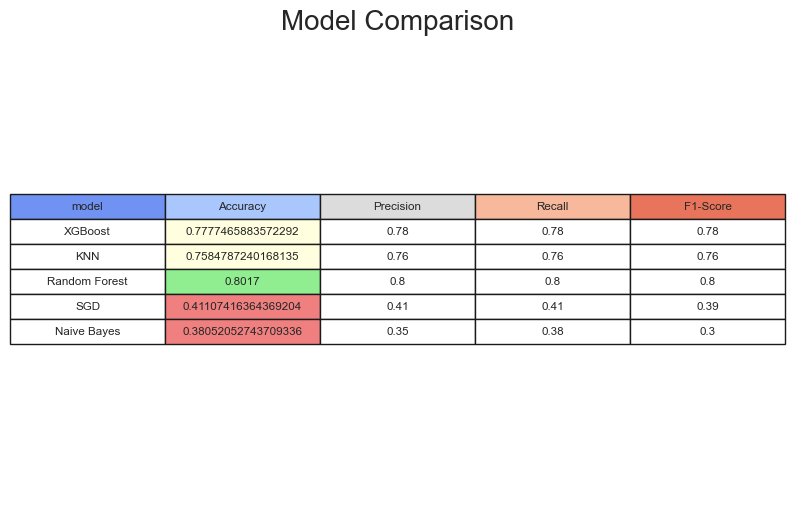

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    "model": ["XGBoost", "KNN", "Random Forest", "SGD", "Naive Bayes"],
    "Accuracy": [0.7777465883572292, 0.7584787240168135, 0.8017, 0.41107416364369204, 0.38052052743709336],
    "Precision": [0.78, 0.76, 0.80, 0.41, 0.35],
    "Recall": [0.78, 0.76, 0.80, 0.41, 0.38],
    "F1-Score": [0.78, 0.76, 0.80, 0.39, 0.30]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the table with colors
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale=1.2)
colors = sns.color_palette("RdYlGn", as_cmap=True)

# Plot the table
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  colColours=sns.color_palette("coolwarm", len(df.columns)))

# Apply color to cells
for i, value in enumerate(df["Accuracy"]):
    if value > 0.8:
        color = "lightgreen"
    elif value > 0.6:
        color = "lightyellow"
    else:
        color = "lightcoral"
    table[(i+1, 1)].set_facecolor(color)

# Adjust layout
table.scale(1, 1.5)
ax.axis('off')
plt.title('Model Comparison', fontsize=20)
plt.show()

# feature importance curve for XGBoost Calssifier

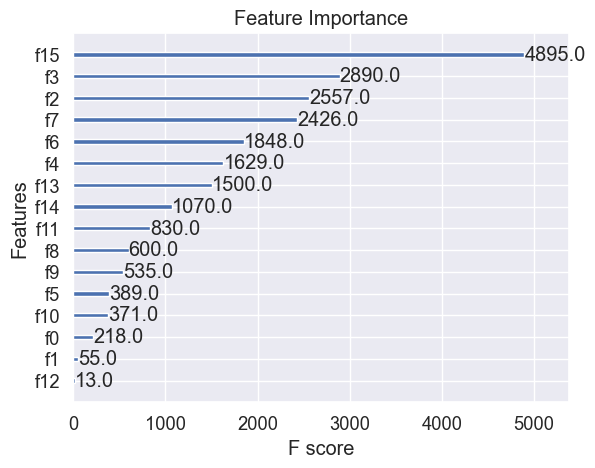

In [57]:
import xgboost as xgb
xgb.plot_importance(xgb_clf)
plt.title('Feature Importance')
plt.show()

# feature importance curve for Random Forest algorithm

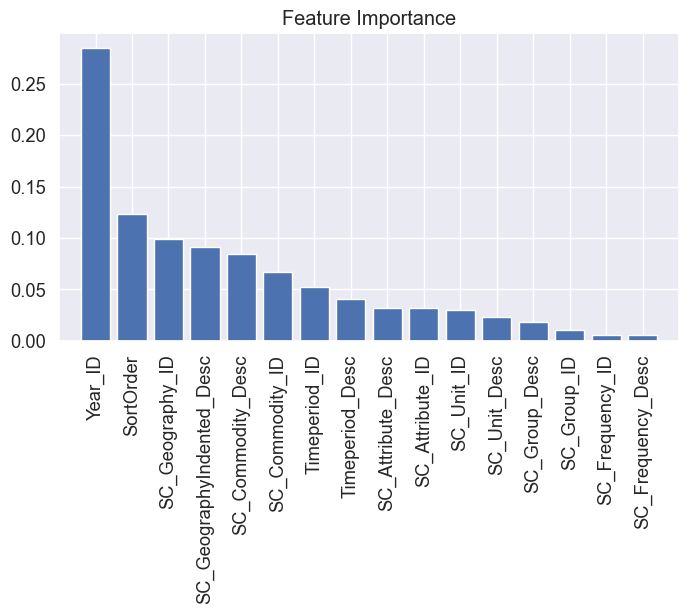

In [58]:
# Plotting feature importance for the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# feature importance curve for Naive Bayes

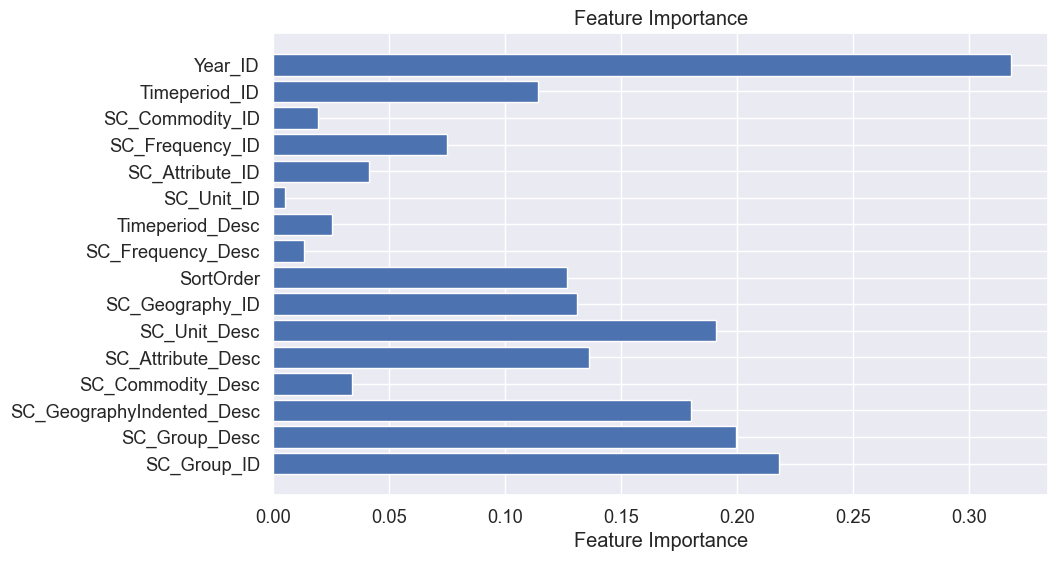

In [59]:
# Calculate feature importance based on the variance or mean differences
feature_importance = np.abs(nb_clf.theta_[1] - nb_clf.theta_[0])  # Using the mean differences

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Confusion Matrix

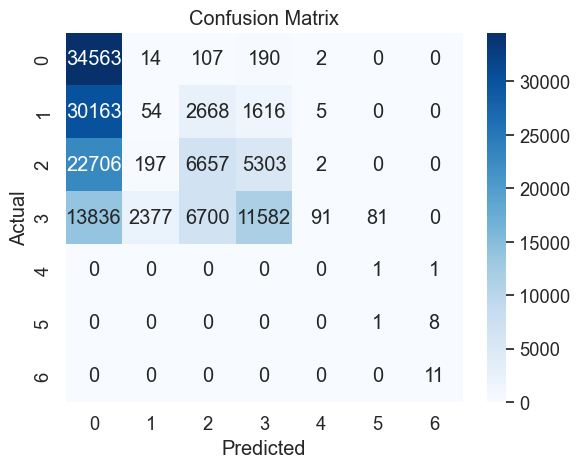

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

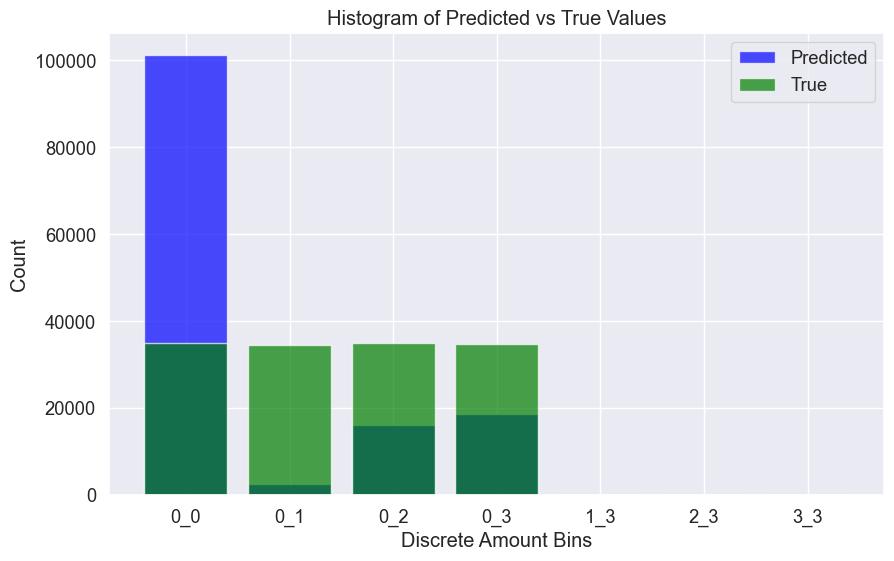

In [61]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have predictions stored in 'y_pred' and true labels in 'y_test'

# Histogram curve for predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=np.arange(8)-0.5, rwidth=0.8, alpha=0.7, color='blue', label='Predicted')
plt.hist(y_test, bins=np.arange(8)-0.5, rwidth=0.8, alpha=0.7, color='green', label='True')
plt.xlabel('Discrete Amount Bins')
plt.ylabel('Count')
plt.title('Histogram of Predicted vs True Values')
plt.xticks(np.arange(7), labels=['0_0', '0_1', '0_2', '0_3', '1_3', '2_3', '3_3'])
plt.legend()
plt.show()

Predicted Future Price : ['0_2']
Predicted Future Feed Grain Quality: moderate
Predicted Seasonal Trend of Feed Grains: Decreasing (Low impact)


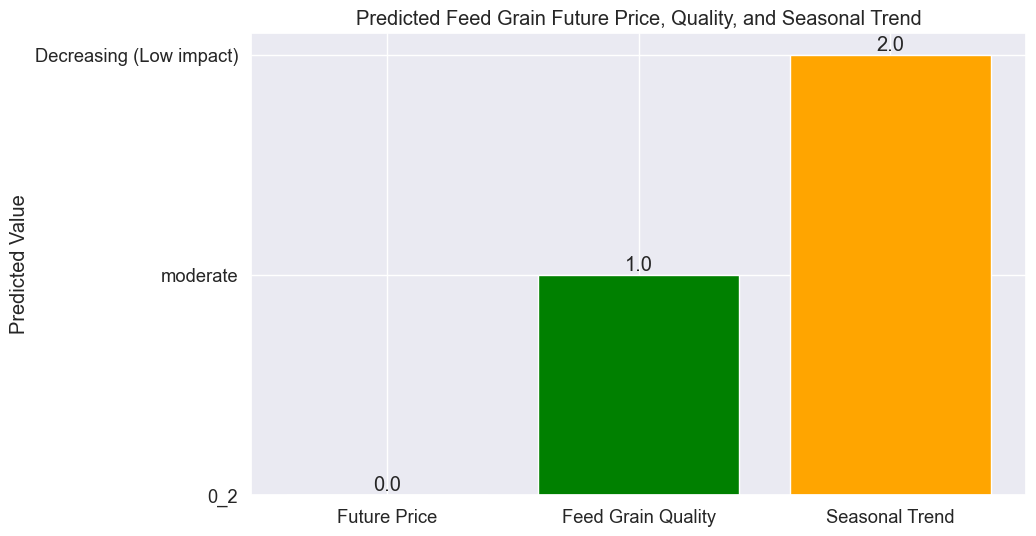

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Predicting future prices
new_data = pd.DataFrame({
    'SC_Group_ID': [2],
    'SC_Group_Desc': [4],
    'SC_GeographyIndented_Desc': [208],
    'SC_Commodity_Desc': [25],
    'SC_Attribute_Desc': [32],
    'SC_Unit_Desc': [4],
    'SC_Geography_ID': [2],
    'SortOrder': [0.8],
    'SC_Frequency_Desc': [1],
    'Timeperiod_Desc': [54],
    'SC_Unit_ID': [8],
    'SC_Attribute_ID': [25],
    'SC_Frequency_ID': [5],
    'SC_Commodity_ID': [4],
    'Timeperiod_ID': [8],
    'Year_ID': [2025]
})

# Standardize the new data
new_data_standardized = scaler.transform(new_data)

# Predicting future prices for new_data
future_pred = knn.predict(new_data_standardized)

# Decode the predicted label
future_pred_decoded = label_encoder.inverse_transform(future_pred)
print('Predicted Future Price :', future_pred_decoded)

# Feed Grain Quality
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:
    quality = 'good'
elif future_pred_decoded in ['0_1', '0_2']:
    quality = 'moderate'
else:
    quality = 'stable'
    
print('Predicted Future Feed Grain Quality:', quality)

# Seasonal Trends
if future_pred_decoded in ['0_3', '1_3', '2_3', '3_3']:
    trend = 'Increasing (high impact)'
elif future_pred_decoded in ['0_1', '0_2']:
    trend = 'Decreasing (Low impact)'
else:
    trend = 'stable'
    
print('Predicted Seasonal Trend of Feed Grains:', trend)

# Data for visualization
predicted_data = {
    'Category': ['Future Price', 'Feed Grain Quality', 'Seasonal Trend'],
    'Prediction': [future_pred_decoded[0], quality, trend]
}

df_predicted = pd.DataFrame(predicted_data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_predicted['Category'], df_predicted['Prediction'], color=['blue', 'green', 'orange'])

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Setting labels and title
ax.set_ylabel('Predicted Value')
ax.set_title('Predicted Feed Grain Future Price, Quality, and Seasonal Trend')

plt.show()


# precision Recall curve for Random forest report

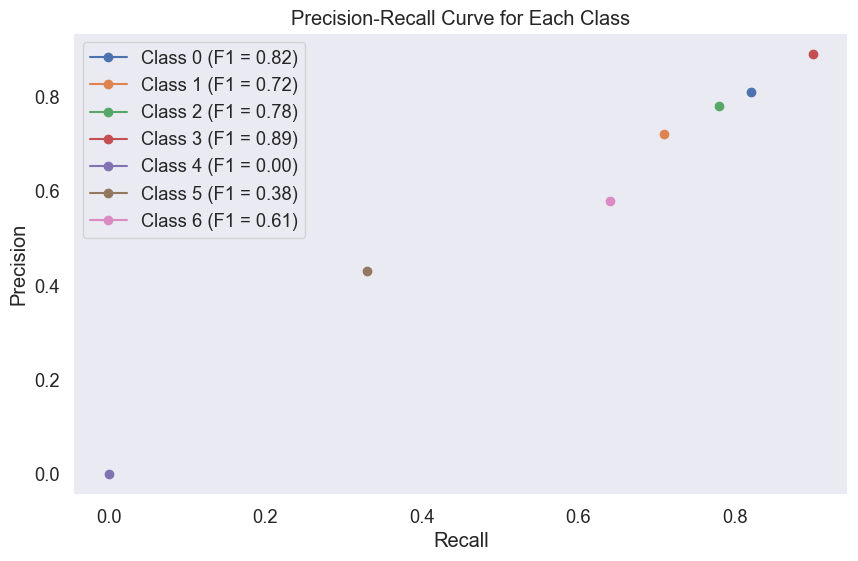

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Sample data
y_true = [0, 1, 2, 3, 4, 5, 6]  # True class labels
y_pred = {
    0: [0.81, 0.82, 0.82, 34876],
    1: [0.72, 0.71, 0.72, 34506],
    2: [0.78, 0.78, 0.78, 34865],
    3: [0.89, 0.90, 0.89, 34667],
    4: [0.00, 0.00, 0.00, 2],
    5: [0.43, 0.33, 0.38, 9],
    6: [0.58, 0.64, 0.61, 11]
}

# Convert precision, recall, f1-score to arrays for plotting
precision = [0.81, 0.72, 0.78, 0.89, 0.00, 0.43, 0.58]
recall = [0.82, 0.71, 0.78, 0.90, 0.00, 0.33, 0.64]
f1_score = [0.82, 0.72, 0.78, 0.89, 0.00, 0.38, 0.61]

# Create precision-recall curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(y_true)):
    plt.plot(recall[i], precision[i], marker='o', label=f'Class {i} (F1 = {f1_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.grid()
plt.show()
